In [61]:
#Yuvan Shankar J 2019504609 Assignment 3
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Image Augmentation

In [62]:
da = Sequential(
  [
    layers.RandomFlip("horizontal",input_shape=(180, 180, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)


In [63]:
traindata = tf.keras.utils.image_dataset_from_directory(
  "/content/drive/MyDrive/flowers",
  validation_split=0.25,
  subset="training",
  seed=132,
  image_size=(180, 180),
  batch_size=100)

Found 4317 files belonging to 5 classes.
Using 3238 files for training.


In [64]:
validationdata = tf.keras.utils.image_dataset_from_directory(
  "/content/drive/MyDrive/flowers",
  validation_split=0.25,
  subset="validation",
  seed=132,
  image_size=(180, 180),
  batch_size=100)

Found 4317 files belonging to 5 classes.
Using 1079 files for validation.


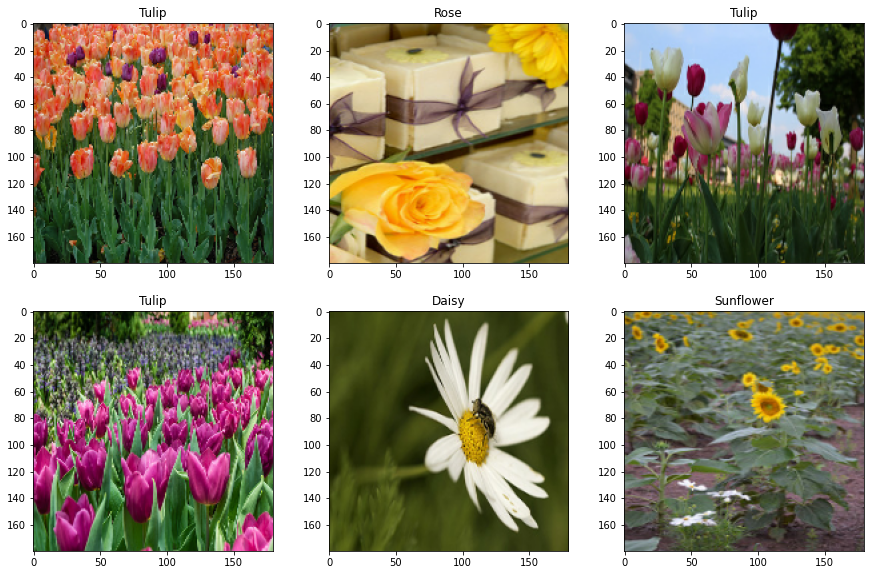

In [66]:
class_name=["Daisy","Dandelion","Rose","Sunflower","Tulip"]
plt.figure(figsize=(15, 15))
for images, labels in traindata.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_name[labels[i]])

In [68]:
normalization_layer = layers.Rescaling(1./255)
dataset_normalized = train_data_set.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(dataset_normalized))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.0 0.9993137


# Creating a model

In [69]:
model=Sequential()

# Adding layers

In [70]:
num_classes = len(class_names)

model = Sequential([
  da,
  layers.Rescaling(1./255, input_shape=(180, 180, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'), #convolutional layer
  layers.MaxPooling2D(),#maxpooling layer
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  # adding flatten
  layers.Flatten(),
  # adding dense hidden layer
  layers.Dense(128, activation='relu'),
  # adding dense output layer
  layers.Dense(num_classes)
])

# Compile the model

In [71]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

# Fit the model

In [72]:
epochs=15
history=model.fit(traindata,validation_data=validationdata,epochs=epochs)

Epoch 1/15
33/33 [==============================] - 131s 4s/step - loss: 1.4177 - accuracy: 0.3953 - val_loss: 1.1650 - val_accuracy: 0.5440
Epoch 2/15
33/33 [==============================] - 127s 4s/step - loss: 1.0820 - accuracy: 0.5565 - val_loss: 1.1404 - val_accuracy: 0.5570
Epoch 3/15
33/33 [==============================] - 125s 4s/step - loss: 1.0051 - accuracy: 0.5939 - val_loss: 1.0266 - val_accuracy: 0.6006
Epoch 4/15
33/33 [==============================] - 122s 4s/step - loss: 0.9600 - accuracy: 0.6248 - val_loss: 0.9819 - val_accuracy: 0.6311
Epoch 5/15
33/33 [==============================] - 124s 4s/step - loss: 0.9160 - accuracy: 0.6411 - val_loss: 0.9572 - val_accuracy: 0.6284
Epoch 6/15
33/33 [==============================] - 123s 4s/step - loss: 0.8711 - accuracy: 0.6652 - val_loss: 0.9363 - val_accuracy: 0.6432
Epoch 7/15
33/33 [==============================] - 125s 4s/step - loss: 0.8404 - accuracy: 0.6751 - val_loss: 0.9532 - val_accuracy: 0.6256
Epoch 8/15
33

# Save the model

In [73]:
model.save('Flowers-Classification.h5')

# Test the model

In [74]:
#11746080_963537acdc.jpg - Tulip 
img=image.load_img("/content/drive/MyDrive/flowers/tulip/11746080_963537acdc.jpg",target_size=(180,180))

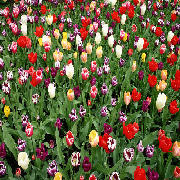

In [75]:
img

In [76]:
x=image.img_to_array(img)

In [77]:
x.shape

(180, 180, 3)

In [78]:
x=np.expand_dims(x,axis=0)
x.shape

(1, 180, 180, 3)

In [79]:
prediction=model.predict(x)
class_name=["Daisy","Dandelion","Rose","Sunflower","Tulip"]
pred=prediction.argmax(axis=1)[0]
print(str(class_name[pred]))

Tulip


In [80]:
score = tf.nn.softmax(prediction[0])
print(class_name[np.argmax(score)],100 * np.max(score))

Tulip 99.91368651390076
